In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
# Define data filepath
pathname = '/Users/morganscafidi/Documents/GitHub/geospatial-data-science/labs/lab2/Wildfire'

# Read data
df = gpd.read_file('/Users/morganscafidi/Documents/GitHub/geospatial-data-science/labs/lab2/Wildfire/' + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [9]:
# Find column labels
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [10]:
# Find columns datatypes
df.dtypes

OBJECTID       float64
FOD_ID           int64
FPA_ID          object
SOURCE_SYS      object
SOURCE_S_1      object
NWCG_REPOR      object
NWCG_REP_1      object
NWCG_REP_2      object
SOURCE_REP      object
SOURCE_R_1      object
LOCAL_FIRE      object
LOCAL_INCI      object
FIRE_CODE       object
FIRE_NAME       object
ICS_209_PL      object
ICS_209__1      object
MTBS_ID         object
MTBS_FIRE_      object
COMPLEX_NA      object
FIRE_YEAR        int64
DISCOVERY_      object
DISCOVER_1       int64
DISCOVER_2      object
NWCG_CAUSE      object
NWCG_GENER      object
NWCG_CAU_1      object
CONT_DATE       object
CONT_DOY       float64
CONT_TIME       object
FIRE_SIZE      float64
FIRE_SIZE_      object
LATITUDE       float64
LONGITUDE      float64
OWNER_DESC      object
STATE           object
COUNTY          object
FIPS_CODE       object
FIPS_NAME       object
geometry      geometry
dtype: object

In [11]:
# Get some stats for numeric columns
df['FIRE_SIZE'].describe()

count     67042.000000
mean        144.878795
std        3815.600420
min           0.010000
25%           0.100000
50%           0.100000
75%           0.330000
max      558198.300000
Name: FIRE_SIZE, dtype: float64

In [12]:
# Filter fires larger than 100 acres
df_large = df[df['FIRE_SIZE'] > 100]

In [13]:
# Find mean size of wildfires larger than 100 acres
df_large['FIRE_SIZE'].mean()

5077.047927022739

In [14]:
# Find the different cause of large wildfires
df_large['NWCG_CAUSE'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [15]:
# Filter fires that were caused by natural causes
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']

In [16]:
# Find date of discovery
df_large_natural['DISCOVERY_']

56       2008/07/02 00:00:00.000
89       2000/07/22 00:00:00.000
95       2007/08/31 00:00:00.000
96       2003/06/29 00:00:00.000
109      2007/07/13 00:00:00.000
                  ...           
67007    2017/08/29 00:00:00.000
67008    2011/09/15 00:00:00.000
67014    2014/09/16 00:00:00.000
67017    2013/08/07 00:00:00.000
67022    2016/08/17 00:00:00.000
Name: DISCOVERY_, Length: 1164, dtype: object

In [17]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [47]:
df_large_natural['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!

In [19]:
# Filter large, natural wildfires in 2016
df_large_natural_2016 = df_large_natural[df_large_natural['datetime'].dt.year == 2016]

In [20]:
# Find number of large fires in each year (i.e. number of rows in each year)
large_fire_count = df_large.iloc[:,0].groupby(df_large_natural['datetime'].dt.year).count()

In [21]:
# Find acres of wildfire for each year
large_fire_area = df_large['FIRE_SIZE'].groupby(df_large_natural['datetime'].dt.year).sum()

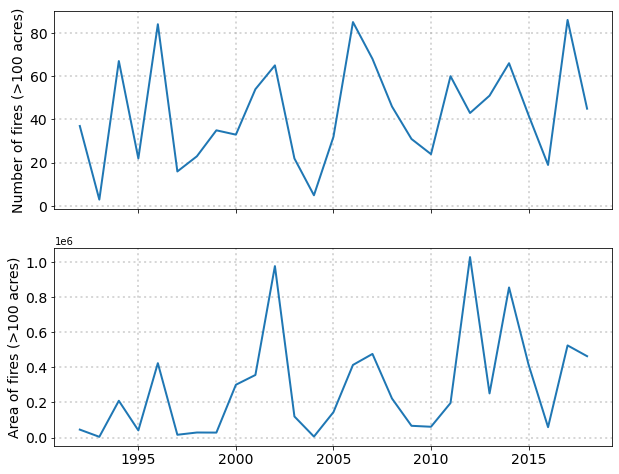

In [22]:
# Plot number and acres of wildfire for each year
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)
ax1.plot(large_fire_count, lw=2)
ax1.set_ylabel('Number of fires (>100 acres)', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(ls='dotted', lw=2, alpha=0.5)

ax2.plot(large_fire_area, lw=2)
ax2.set_ylabel('Area of fires (>100 acres)', fontsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(ls='dotted', lw=2, alpha=0.5)

In [23]:
df_large = df[df['FIRE_SIZE'] > 50]

In [35]:
df['FIPS_NAME'].describe()

count              45898
unique                45
top       Jackson County
freq                4284
Name: FIPS_NAME, dtype: object

In [36]:
df_large['FIPS_NAME'].describe()

count               1615
unique                39
top       Malheur County
freq                 264
Name: FIPS_NAME, dtype: object

In [37]:
df_large = df[df['FIRE_SIZE'] > 50]

In [38]:
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Human']

In [39]:
df_large['FIPS_NAME',].describe()

count               1615
unique                39
top       Malheur County
freq                 264
Name: FIPS_NAME, dtype: object

In [40]:
df_large = df[df['FIRE_SIZE'] > 50]

In [41]:
df_large= df_large[df_large['NWCG_CAUSE'] == 'Human']

In [42]:
df_large['FIPS_NAME'].describe()

count              627
unique              38
top       Wasco County
freq                71
Name: FIPS_NAME, dtype: object

In [43]:
df_large = df[df['FIRE_SIZE'] > 100]

In [44]:
df_large= df_large[df_large['NWCG_CAUSE'] == 'Natural']

In [45]:
df_large['FIPS_NAME'].describe()

count                793
unique                28
top       Malheur County
freq                 183
Name: FIPS_NAME, dtype: object

In [ ]:
df_large['FIPS_NAME'].describe()

In [137]:
df_large = df[df['FIRE_SIZE'] > 100]

In [138]:
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']

In [139]:
df_large_natural['CONT_DATE'].shape

(1164,)

In [63]:
df

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1586162.0,201604465,SFO-2012ORODF1272303413,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.50,B,42.238610,-124.394720,PRIVATE,OR,Curry,41015,Curry County,POINT (-124.39472 42.23861)
1,1216678.0,1475171,W-610834,FED,DOI-WFMI,BLM,USORCBD,Coos Bay District,ORCBD,Coos Bay District,...,0.10,A,42.251900,-124.378900,PRIVATE,OR,Curry,41015,Curry County,POINT (-124.37890 42.25190)
2,1826690.0,300247467,SFO-2015ORODF1572310116,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.37,B,42.254170,-124.392500,PRIVATE,OR,Curry,41015,Curry County,POINT (-124.39250 42.25417)
3,1986235.0,400114024,SFO-2017ORODF1772303518,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.01,A,42.267920,-124.399720,STATE,OR,Curry,41015,Curry County,POINT (-124.39972 42.26792)
4,1145371.0,1397051,ODF-86539,NONFED,ST-ORORS,ST/C&L,USOR723S,Gold Beach Unit,ORODF-723,Gold Beach Unit,...,148.00,D,42.273060,-124.402500,STATE,OR,8,41015,Curry County,POINT (-124.40250 42.27306)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67037,2073814.0,400333029,SFO-2018ORODF1858206518,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.01,A,44.714970,-122.492360,STATE,OR,Linn,41043,Linn County,POINT (-122.49236 44.71497)
67038,2073938.0,400333176,SFO-2018ORODF1858200719,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.01,A,44.714970,-122.492280,STATE,OR,Linn,41043,Linn County,POINT (-122.49228 44.71497)
67039,2073818.0,400333033,SFO-2018ORODF1858206618,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.01,A,44.715030,-122.492390,STATE,OR,Linn,41043,Linn County,POINT (-122.49239 44.71503)
67040,2068578.0,400326229,SFO-2018ORODF1858203019,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,9.50,B,44.679140,-122.798750,PRIVATE,OR,Linn,41043,Linn County,POINT (-122.79875 44.67914)


In [64]:
df_large = df[df['FIRE_SIZE'] > 200]

In [65]:
df_large= df_large[df_large['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [66]:
df_large['FOD_ID'].describe()

count    1.300000e+01
mean     2.193693e+08
std      1.866062e+08
min      3.781230e+05
25%      1.500145e+07
50%      2.017856e+08
75%      4.003898e+08
max      4.003898e+08
Name: FOD_ID, dtype: float64

In [67]:
df_large = df[df['FIRE_SIZE'] > 200]

In [68]:
df_large= df_large[df_large['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [134]:
df_large['OBJECTID'].shape

(13,)

In [78]:
df_large['FIRE_SIZE'].max ()

23600.0

In [79]:
df_large['FIRE_SIZE'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 190        660.0
9755     23600.0
9871       500.0
11524      717.0
13028      800.0
41888      310.0
45288      800.0
51464      241.0
56054      397.0
60018      633.0
60853     1548.0
63516      700.0
66793     1007.0
Name: FIRE_SIZE, dtype: float64>

In [83]:
df_large['FIRE_SIZE'].max()

23600.0

In [85]:
df_large['FIRE_NAME'].describe

<bound method NDFrame.describe of 190      JUNIPER BLUFFS
9755      SEALE 1045 RN
9871           ANTELOPE
11524             MECCA
13028       LONG BRANCH
41888       SPRUCE LAKE
45288        LOST CREEK
51464     SAINT PATRICK
56054     LOBSTER CREEK
60018        DEER RIDGE
60853        DEER CREEK
63516          HORSEFLY
66793            RIFFLE
Name: FIRE_NAME, dtype: object>

In [86]:
df_large['FIPS_NAME'].describe

<bound method NDFrame.describe of 190       Umatilla County
9755       Gilliam County
9871                 None
11524    Jefferson County
13028        Baker County
41888      Klamath County
45288                None
51464         Lake County
56054        Curry County
60018      Jackson County
60853    Josephine County
63516                None
66793                None
Name: FIPS_NAME, dtype: object>

In [88]:
df_large['DISCOVERY_'].describe

<bound method NDFrame.describe of 190      2016/09/12 00:00:00.000
9755     2018/08/17 00:00:00.000
9871     2000/08/08 00:00:00.000
11524    2018/07/02 00:00:00.000
13028    2018/09/20 00:00:00.000
41888    2017/10/01 00:00:00.000
45288    2000/08/11 00:00:00.000
51464    2012/09/12 00:00:00.000
56054    2018/07/01 00:00:00.000
60018    2009/09/21 00:00:00.000
60853    2005/08/25 00:00:00.000
63516    2003/06/09 00:00:00.000
66793    2013/09/16 00:00:00.000
Name: DISCOVERY_, dtype: object>

In [89]:
df_large['DISCOVERY_'].describe()

count                          13
unique                         13
top       2016/09/12 00:00:00.000
freq                            1
Name: DISCOVERY_, dtype: object

In [90]:
df_large[['DISCOVERY_','FIPS_NAME','FIRE_NAME']].describe()

,DISCOVERY_,FIPS_NAME,FIRE_NAME
count,13,9,13
unique,13,9,13
top,2016/09/12 00:00:00.000,Umatilla County,JUNIPER BLUFFS
freq,1,1,1


In [91]:
df_large['FIRE_SIZE'].max()
df_large['FIRE_SIZE'].max()

,DISCOVERY_,FIPS_NAME,FIRE_NAME
count,13,9,13
unique,13,9,13
top,2016/09/12 00:00:00.000,Umatilla County,JUNIPER BLUFFS
freq,1,1,1


In [92]:
df_large['FIRE_SIZE'].max()

23600.0

In [98]:
df_large[['DISCOVERY_','FIPS_NAME']].describe()

,DISCOVERY_,FIPS_NAME
count,13,9
unique,13,9
top,2016/09/12 00:00:00.000,Umatilla County
freq,1,1


In [120]:
df_large['FIRE_SIZE'].max()

23600.0

In [121]:
df_largest_fire=df_large['FIRE_SIZE'].max()

In [127]:
df_large['FIRE_SIZE'].max()
df_largest_fire=df_large['FIRE_SIZE'].max()

In [132]:
df[df["FIRE_SIZE"]==df["FIRE_SIZE"].max()][['DISCOVERY_','FIRE_NAME','FIPS_NAME',"FIRE_SIZE"]]

,DISCOVERY_,FIRE_NAME,FIPS_NAME,FIRE_SIZE
66964,2012/07/08 00:00:00.000,LONG DRAW,Malheur County,558198.3


In [146]:
df_large = df[df['FIRE_SIZE'] > 50]

In [147]:
lane_county_fires = df_large[df_large['FIPS_NAME'] == 'Lane County']

In [148]:
lane_county_fires['OBJECTID'].shape

(33,)

In [149]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [150]:
# Print list of tables
acs.filter_tables('POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B05006,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,"[B05006_001E, B05006_002E, B05006_003E, B05006..."
B05007,PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...,"[B05007_001E, B05007_002E, B05007_003E, B05007..."
B05008,SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...,"[B05008_001E, B05008_002E, B05008_003E, B05008..."
B05013,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,"[B05013_001E, B05013_002E, B05013_003E, B05013..."
...,...,...
C24030,SEX BY INDUSTRY FOR THE CIVILIAN EMPLOYED POPU...,"[C24030_001E, C24030_002E, C24030_003E, C24030..."
C24040,"SEX BY INDUSTRY FOR THE FULL-TIME, YEAR-ROUND ...","[C24040_001E, C24040_002E, C24040_003E, C24040..."
C24050,INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLO...,"[C24050_001E, C24050_002E, C24050_003E, C24050..."


In [151]:
# Print list of variables
acs.filter_variables('B01003')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,NaN,"B01003_001EA,B01003_001M,B01003_001MA",NaN


In [153]:
# Download data
lane_pop = products.ACS(2019).from_county('Lane County, OR', level='tract',
                                        variables=['B01003_001E']) # don't worry about the deprecation message!

/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [154]:
# Calculate some stats
lane_pop['B01003_001E'].describe()

count      87.000000
mean     4291.264368
std      1506.689737
min         0.000000
25%      3287.500000
50%      4068.000000
75%      5205.000000
max      8932.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

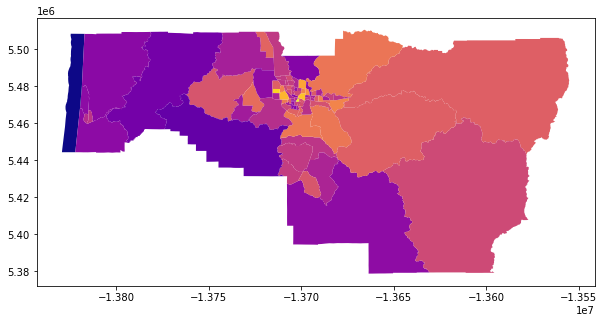

In [157]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
lane_pop.plot('B01003_001E', ax=ax, cmap='plasma')

<AxesSubplot:>

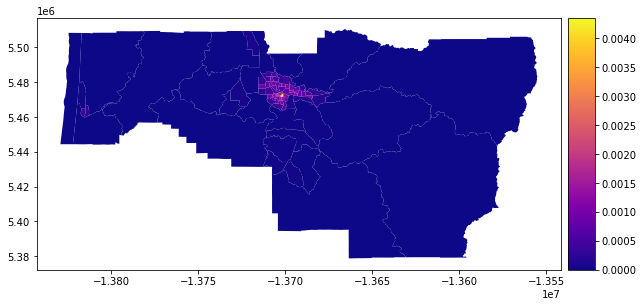

In [160]:
lane_pop['pop_density'] = lane_pop['B01003_001E'] / lane_pop['geometry'].area

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lane_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

In [161]:
lane_pop.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [162]:
# Make 
df_large = df[df['FIRE_SIZE'] > 100]
lane_fires = df_large[df_large['FIPS_NAME'] == 'Lane County']
lane_fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [163]:
lane_fires_proj = lane_fires.to_crs('EPSG:3857')
lane_fires_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

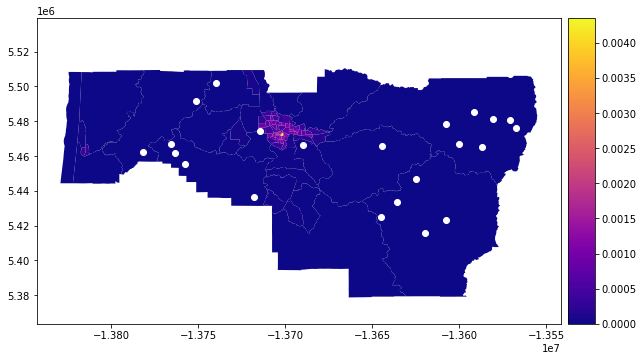

In [165]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lane_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)
lane_fires_proj.plot(ax=ax, c='white')

In [167]:
# Spatial join
joined_df = gpd.sjoin(lane_fires_proj, lane_pop, how='inner', predicate='intersects')

# Groupby tract
tract_count = joined_df.groupby(['tract'], as_index=False)['OBJECTID'].count()
tract_count.columns = ['tract', 'fire_count']

# Merge back to original DataFrame
merged_df = lane_pop.merge(fire_count, on='tract', how='left')

# Clean up data by filling NaNs with 0
merged_df['fire_count'].fillna(0, inplace=True)  

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged_df.plot('fire_count', ax=ax, cmap='plasma', legend=True, cax=cax)

NameError: name 'fire_count' is not defined